In [49]:
import numpy as np
from scipy.special import gamma
#check redshift-angles...distance = c z /H0
distance = 0.1*300000/70
rvir_radians = 2.0/distance
arcmin = rvir_radians*180/3.141*60
print arcmin


16.0458452722


In [50]:
#beta and gNFW profile
import numpy as np
from scipy.special import gamma

#constants for beta profile that affect normalization
mc2sigmaT = 1.0
y0 = 1.0
P_0 = 1.0 
beta0 = 1.0
def betaProfile(r,rc,beta): 
    #uncomment line below once correct constants are used above
    #P_0 = mc2sigmaT (y0/rc) gamma(beta+0.5)/np.sqrt(np.pi)/gamma(beta)
    x = r/rc
    Pressure = P_0/(1 + x**2)**(beta+0.5)
    return Pressure

#example call 
#p = betaProfile(1.,0.5,beta0)
#print p

#constants from Table 1 of Hurier et al
alpha0 = 1.0
beta0 = 4.5
gamma0 = 0.23
delta0 = 1.0
r500_0 = 0.5
c500_0 = 1.0
P0P500 = 1.0
rsh_0 = 2.93*r500_0 
Qsh_0 = 0.6 #0.1 #-0.012 

def gNFWProfile(r,r500,c500,alpha,beta,gamma):
    xsh = rsh/r500
    x = r/r500
    y = x*c500
   
    Pressure = P0P500/(y**gamma * (1.+y**alpha)**((beta-gamma)/alpha))
   
    return Pressure

#power law cutoff. option to change to exponential.
def gNFWProfile_delta(r,r500,rsh,c500,alpha,beta,gamma):
    xsh = rsh/r500
    x = r/r500
    y = x*c500
    if x<xsh:
        Pressure = P0P500/(y**gamma * (1.+y**alpha)**((beta-gamma)/alpha))
    elif x>=xsh:
        Pressure = P0P500/(y**gamma * (1.+y**alpha)**((beta-gamma)/alpha))/ (x/xsh)**delta
        #Pressure = P0P500/(y**gamma * (1.+y**alpha)**((beta-gamma)/alpha))*(np.exp(1 - (x/xsh)))
    return Pressure

#power law cutoff with a drop in the pressure at r > shock radius
def gNFWProfile_Qsh_delta(r,r500,rsh,Qsh,c500,alpha,beta,gamma):
    xsh = rsh/r500
    x = r/r500
    y = x*c500
    if x<xsh:
        Pressure = P0P500/(y**gamma * (1.+y**alpha)**((beta-gamma)/alpha))
    elif x>=xsh:
        Pressure = Qsh*(np.exp(1 - (x/xsh)))*P0P500/(y**gamma * (1.+y**alpha)**((beta-gamma)/alpha))
    return Pressure

#example call 
alpha = alpha0
beta = beta0
gamma = gamma0
r500 = r500_0
c500 = c500_0
rsh = rsh_0
delta = delta0
Qsh = Qsh_0
#p = gNFWProfile(1.0,r500,c500,alpha,beta,gamma)
#print p

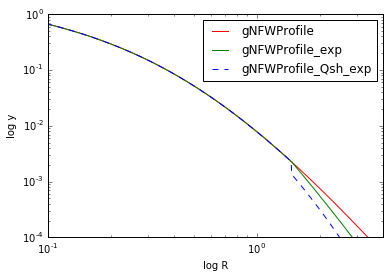

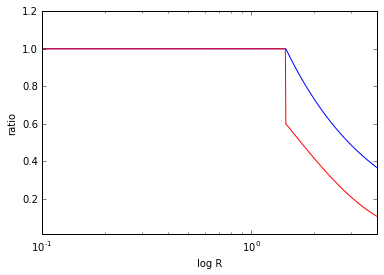

In [51]:
#plot the  profiles. choose parameter values, else inherit from previous cell.
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

imax = 500
xx = np.linspace(0.01,4,imax)
yy = np.zeros(imax); zz = np.zeros(imax); ww = np.zeros(imax); vv = np.zeros(imax)

ww = gNFWProfile(xx,r500,c500,alpha,beta,gamma)
#zz = gNFWProfile_delta(xx,r500,rsh,c500,alpha,beta,gamma)
#vv = gNFWProfile_Qsh_delta(xx,r500,rsh,Qsh,c500,alpha,beta,gamma)

for ii in range (imax):
    #yy[ii] = betaProfile(xx[ii],0.5,beta0)
    #ww[ii] = gNFWProfile(xx[ii],r500,c500,alpha,beta,gamma)
    zz[ii] = gNFWProfile_delta(xx[ii],r500,rsh,c500,alpha,beta,gamma)
    vv[ii] = gNFWProfile_Qsh_delta(xx[ii],r500,rsh,Qsh,c500,alpha,beta,gamma)
    
    #print xx[ii],yy[ii]

plt.figure()    
plt.xlim(0.1,4); plt.ylim(1.0e-4,1)
plt.xlabel("log R"); plt.ylabel("log y")
plt.plot(xx,ww,'r', label = 'gNFWProfile')
plt.plot(xx,zz,'g', label = 'gNFWProfile_exp')
plt.plot(xx,vv,'--', label = 'gNFWProfile_Qsh_exp')
plt.xscale('log');plt.yscale('log')
plt.legend()

plt.figure()
plt.xlim(0.1,4); plt.ylim(0.01,1.2)
plt.plot(xx,zz/ww, 'b')#,label = 'gNFWProfile_exp/gNFWProfile')
plt.plot(xx, (vv/ww), 'r')#, label = 'gNFWProfile_Qsh_exp/gNFWProfile')
plt.xscale('log') 
plt.xlabel("log R"); plt.ylabel("ratio")
plt.legend()


plt.show()